In [5]:
import tensorflow as tf

In [6]:
from tensorflow.examples.tutorials.mnist import input_data

In [7]:
mnist = input_data.read_data_sets("/tmp/data",one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [8]:
type(mnist) ##It is a special tensorflow dataset object

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [9]:
mnist.train.images

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [10]:
mnist.train.images.shape

(55000, 784)

In [11]:
mnist.train.images[2].shape

(784,)

In [15]:
sample = mnist.train.images[2].reshape(28,28)

In [13]:
import matplotlib.pyplot as plt

In [14]:
%matplotlib inline

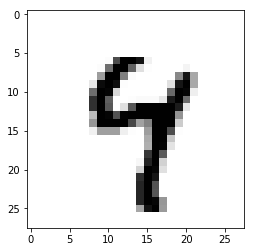

In [17]:
plt.imshow(sample,cmap='Greys')   ##rEALISTIC IMPLEMENTATIONS OF WHAT DATAS ACTUALLY LOOKS LIKE

In [18]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [19]:
n_classes = 10
n_samples = mnist.train.num_examples

In [20]:
n_input = 784

In [21]:
n_hidden_1 = 256
n_hidden_2 = 256

In [31]:
def multilayer_perceptron(x,weights,biases):
    "x:placeHolder for data input"
    "weights: Dict of Weights"
    "biases:dict of bias values"
    
    #First hidden layer with RELU activation
    # X*W + B
    
    layer_1 = tf.add(tf.matmul(x,weights['h1']),biases['b1'])
    #RELU(X*W + B) -> f(x) = max(0,x)
    layer1 = tf.nn.relu(layer_1)
    
    #Second Hidden Layer
    
    layer_2 = tf.add(tf.matmul(layer_1,weights['h2']),biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    
    #Last Output Layer
    out_layer = tf.matmul(layer_2,weights['out']) + biases['out']
    
    return out_layer
    
    

In [25]:
##Weight Dictionaries
weights = {
    
    'h1':tf.Variable(tf.random_normal([n_input,n_hidden_1])),
    'h2':tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_hidden_2,n_classes]))
    
}

In [26]:
weights

{'h1': <tf.Variable 'Variable_3:0' shape=(784, 256) dtype=float32_ref>,
 'h2': <tf.Variable 'Variable_4:0' shape=(256, 256) dtype=float32_ref>,
 'out': <tf.Variable 'Variable_5:0' shape=(256, 10) dtype=float32_ref>}

In [27]:
##Biases Dictionaries
biases = {
    
    'b1':tf.Variable(tf.random_normal([n_hidden_1])),
    'b2':tf.Variable(tf.random_normal([n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_classes]))
    
}


In [35]:
x = tf.placeholder('float',[None,n_input])

In [36]:
y = tf.placeholder('float',[None,n_classes])

In [37]:
pred = multilayer_perceptron(x,weights,biases)

In [39]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y)) ##

In [41]:
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost) ##Optimizer

In [43]:
## Training the Model

In [50]:
t = mnist.train.next_batch(1)

In [52]:
len(t)

2

In [53]:
t[0].shape


(1, 784)

In [54]:
t[1].shape

(1, 10)

In [55]:
Xsamp,ysamp = t

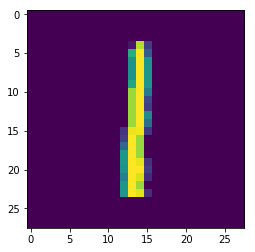

In [56]:
plt.imshow(Xsamp.reshape(28,28))

In [57]:
ysamp

array([[ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [58]:
##Run the Session

In [63]:
sess = tf.InteractiveSession()

In [64]:
init = tf.initialize_all_variables()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [65]:
sess.run(init)

In [68]:
#15 loops
for epoch in range(training_epochs):
    
    #Cost
    avg_cost = 0.0
    total_batch = int(n_samples/batch_size)
    
    for i in range(total_batch):
        
        batch_x,batch_y = mnist.train.next_batch(batch_size)
        _,c = sess.run([optimizer,cost],feed_dict={x:batch_x,y:batch_y})
        
        avg_cost += c/total_batch
    
    print("Epoch: {} cost{:.4f}".format(epoch+1,avg_cost))
    
print("Model has completed {} Epochs of training".format(training_epochs))

Epoch: 1 cost54.2942
Epoch: 2 cost34.9580
Epoch: 3 cost24.9800
Epoch: 4 cost18.7495
Epoch: 5 cost14.0997
Epoch: 6 cost10.7534
Epoch: 7 cost8.4540
Epoch: 8 cost6.6718
Epoch: 9 cost5.3468
Epoch: 10 cost4.2290
Epoch: 11 cost3.5053
Epoch: 12 cost2.8311
Epoch: 13 cost2.2249
Epoch: 14 cost2.0703
Epoch: 15 cost1.6197
Model has completed 15 Epochs of training


In [69]:
##Model Evaluations

In [71]:
correct_predictions = tf.equal(tf.argmax(pred,1),tf.argmax(y,1))

In [73]:
print(correct_predictions[0])

Tensor("strided_slice:0", shape=(), dtype=bool)


In [74]:
correct_predictions = tf.cast(correct_predictions,'float')

In [75]:
print(correct_predictions[0])

Tensor("strided_slice_1:0", shape=(), dtype=float32)


In [76]:
accuracy = tf.reduce_mean(correct_predictions)

In [77]:
type(accuracy)  ##Accuracy is still a tensor object

tensorflow.python.framework.ops.Tensor

In [79]:
mnist.test.labels.shape  ##y_test

(10000, 10)

In [80]:
mnist.test.images.shape   ##x_test

(10000, 784)

In [81]:
accuracy.eval({x:mnist.test.images,y:mnist.test.labels}) 

0.94859999